<p style="color: red;">FYI: Use as kernel <b>MegaPlantTF</b>. Selet this in top -right corner of this notebook.</p>

<div  style="background: #fff;">
    <br>
    <div style="width: 100%; text-align: center;">
        <img src="./utils/assets/biolab.svg" style="width: 14em;"/>
    </div>
    <br>
    <br>
</div>
<div  style="background: #fff;">
    <br>
    <div style="width: 17em; text-align: center; background: red; padding: 1em; border-radius: 10px; color: #fff;">
        HOW TO USE MegaPlantTF?
    </div>
    <br>
    <hr style="color: #d74120;">

</div>


* **Setup**

In [1]:
import sys, os
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

* **Import utils**

In [2]:
from pretrained.predictor import SingleKModel, MultiKModel, OneTestKModel
import metrics

* **Predict**

1- Using single K Model

In [3]:
kmodel = SingleKModel(kmer_size=3)
kmodel.load("./utils/Ach_pep_kiwi-small.fas", format="fasta")
genboard = kmodel.predict()

Predicting:   2%|▏         | 1/58 [00:00<00:06,  8.92it/s]

Predicting: 100%|██████████| 58/58 [00:06<00:00,  8.86it/s]


In [ ]:
genboard.display()

<div  style="background: #fff;">
    <br>
    <div style="width: 17em; text-align: center; background: red; padding: 1em; border-radius: 10px; color: #fff;">
        BENCHMARK FOR COMPARISON
    </div>
    <br>
    <hr style="color: #d74120;">
</div>

In [13]:
import pandas as pd
df = pd.read_csv("../data/testset-full/k3/testset.csv", nrows=10)
df.head()

,AAR,AAT,ACA,ACG,ACR,AEE,AEI,AEM,AEN,AEV,...,AQX,DVW,HDT,MGC,QWW,TFH,TTW,TWH,TWQ,WHM
0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.00339,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.003086,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


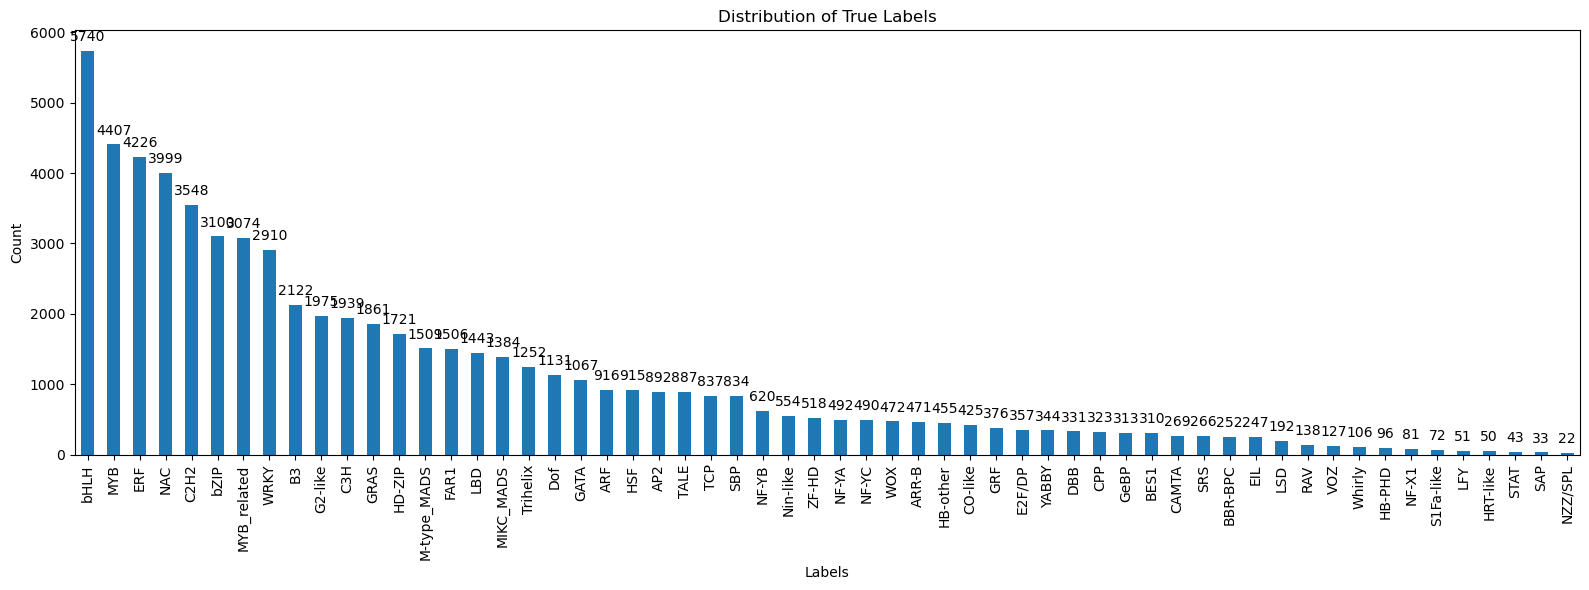

In [14]:
metrics.plot_testset(true_label_df_path="../data/testset-full/k3/true_labels.csv", class_mapping_df_path="../data/testset-full/k3/class_mapping.json")

In [6]:
kmodel = SingleKModel(kmer_size=3)
kmodel.load("../data/testset-full/k3/testset.csv", format="csv", type='kmer_file')
genboard = kmodel.predict()

Predicting: 100%|██████████| 58/58 [06:07<00:00,  6.34s/it]


In [15]:
genboard.display()

<!--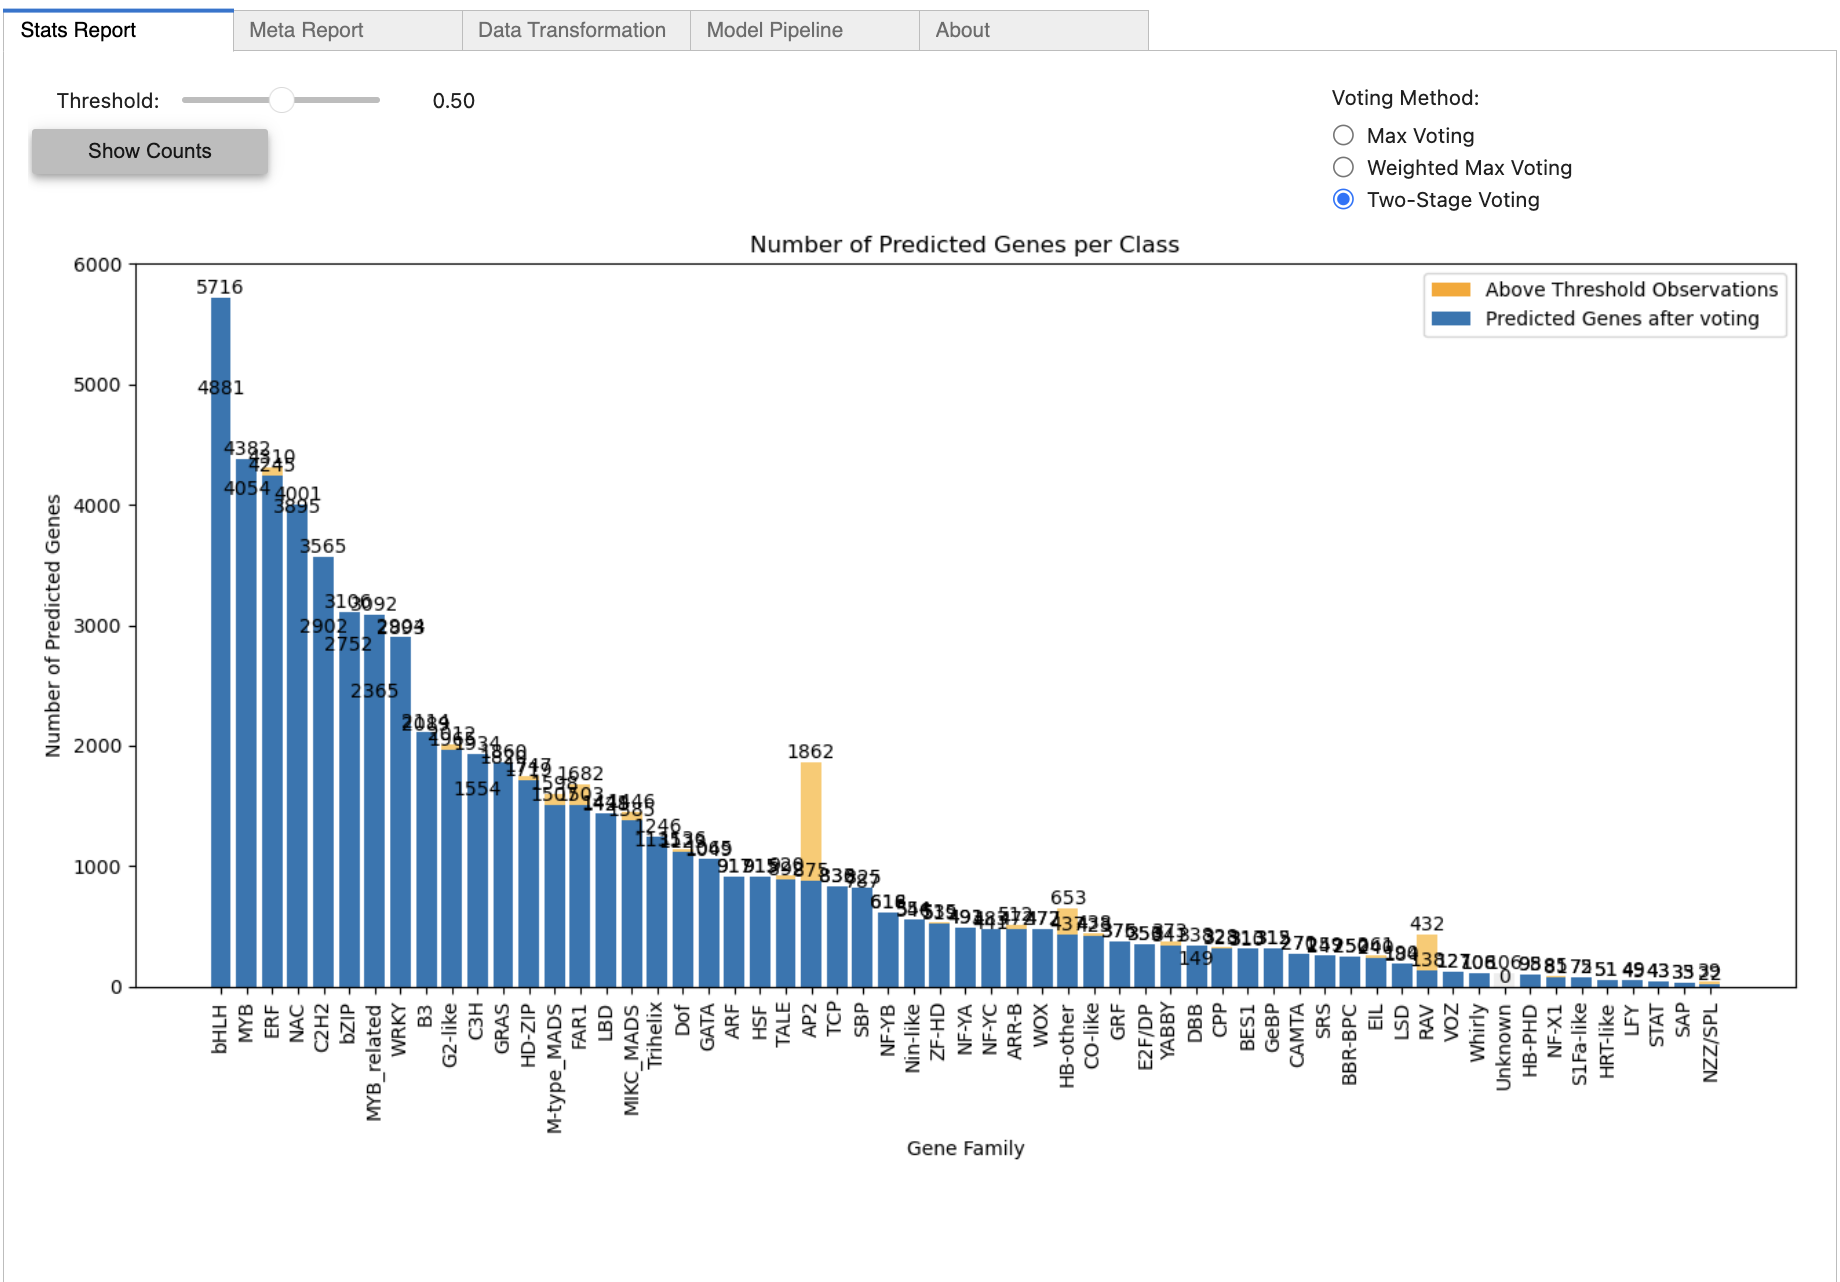

In [16]:
genboard.prediction.shape

(64091, 58)

* **Confusion report for validation**

In [17]:
import json
import pandas as pd

true_label = pd.read_csv('../data/testset-full/k3/true_labels.csv')['true_label'].values
with open('../data/testset-full/k3/class_mapping.json', 'r') as json_file:
    class_mapping = json.load(json_file)
class_mapping['Unknown'] = 0


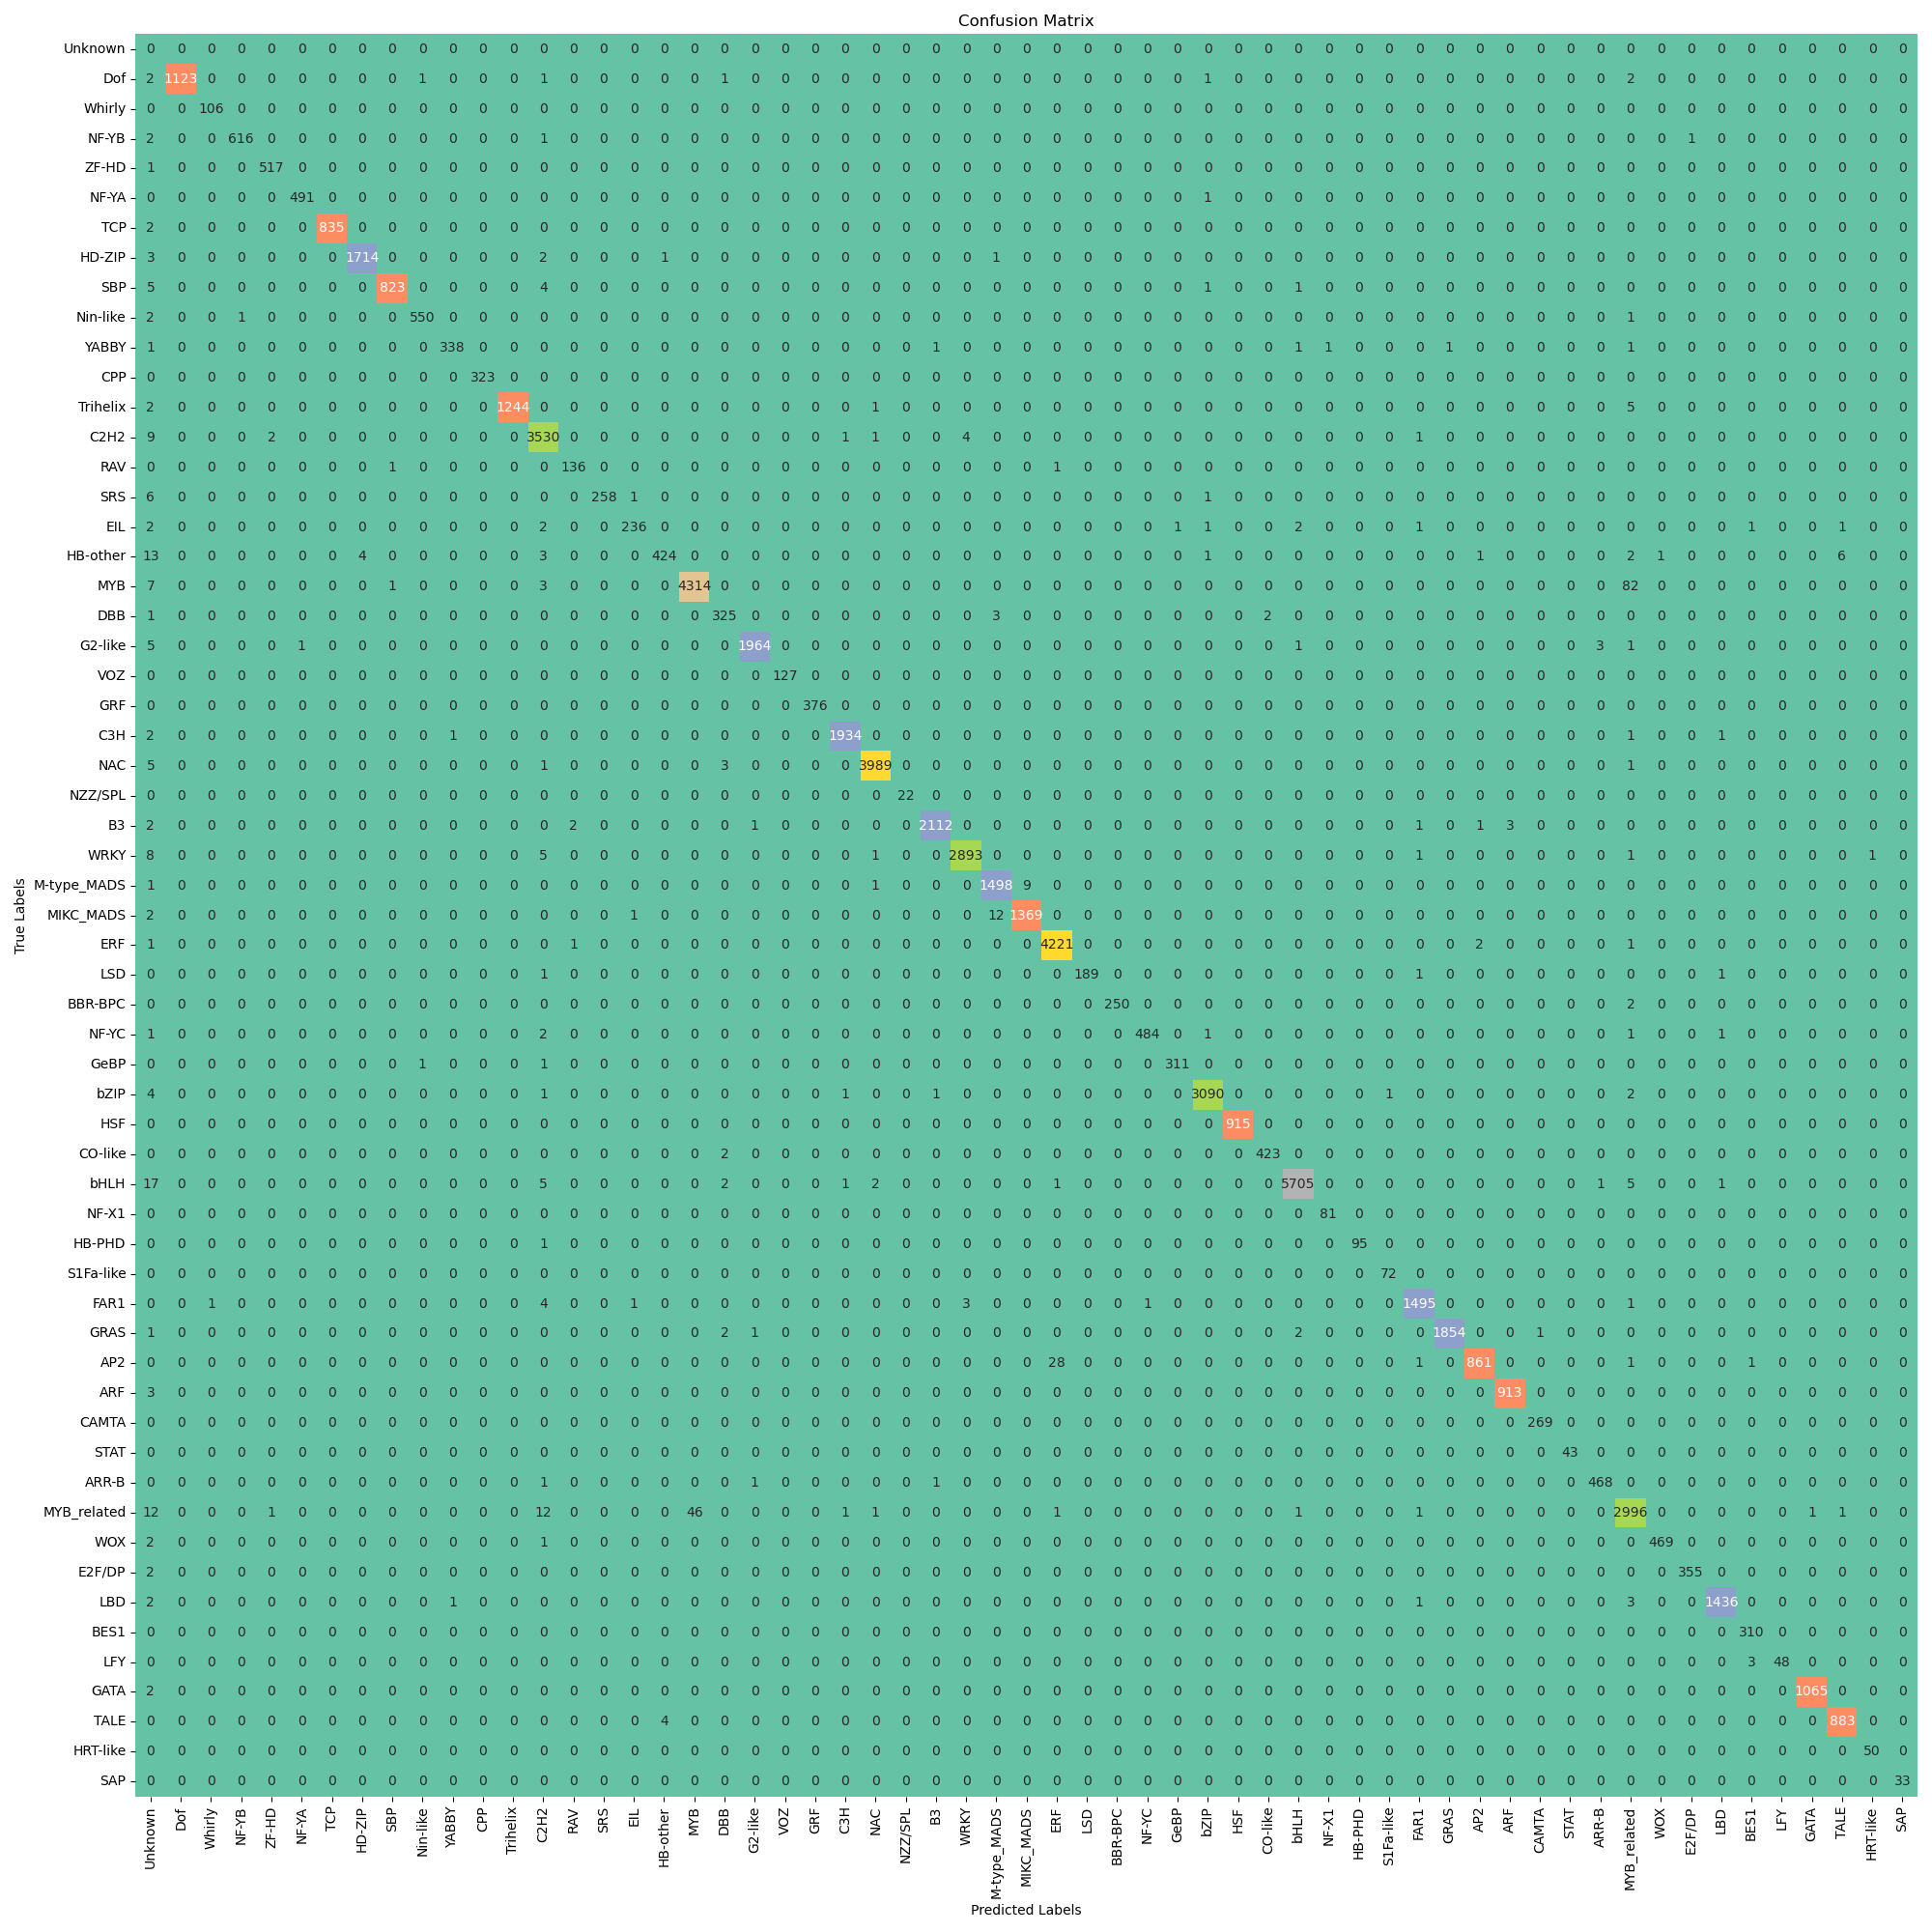
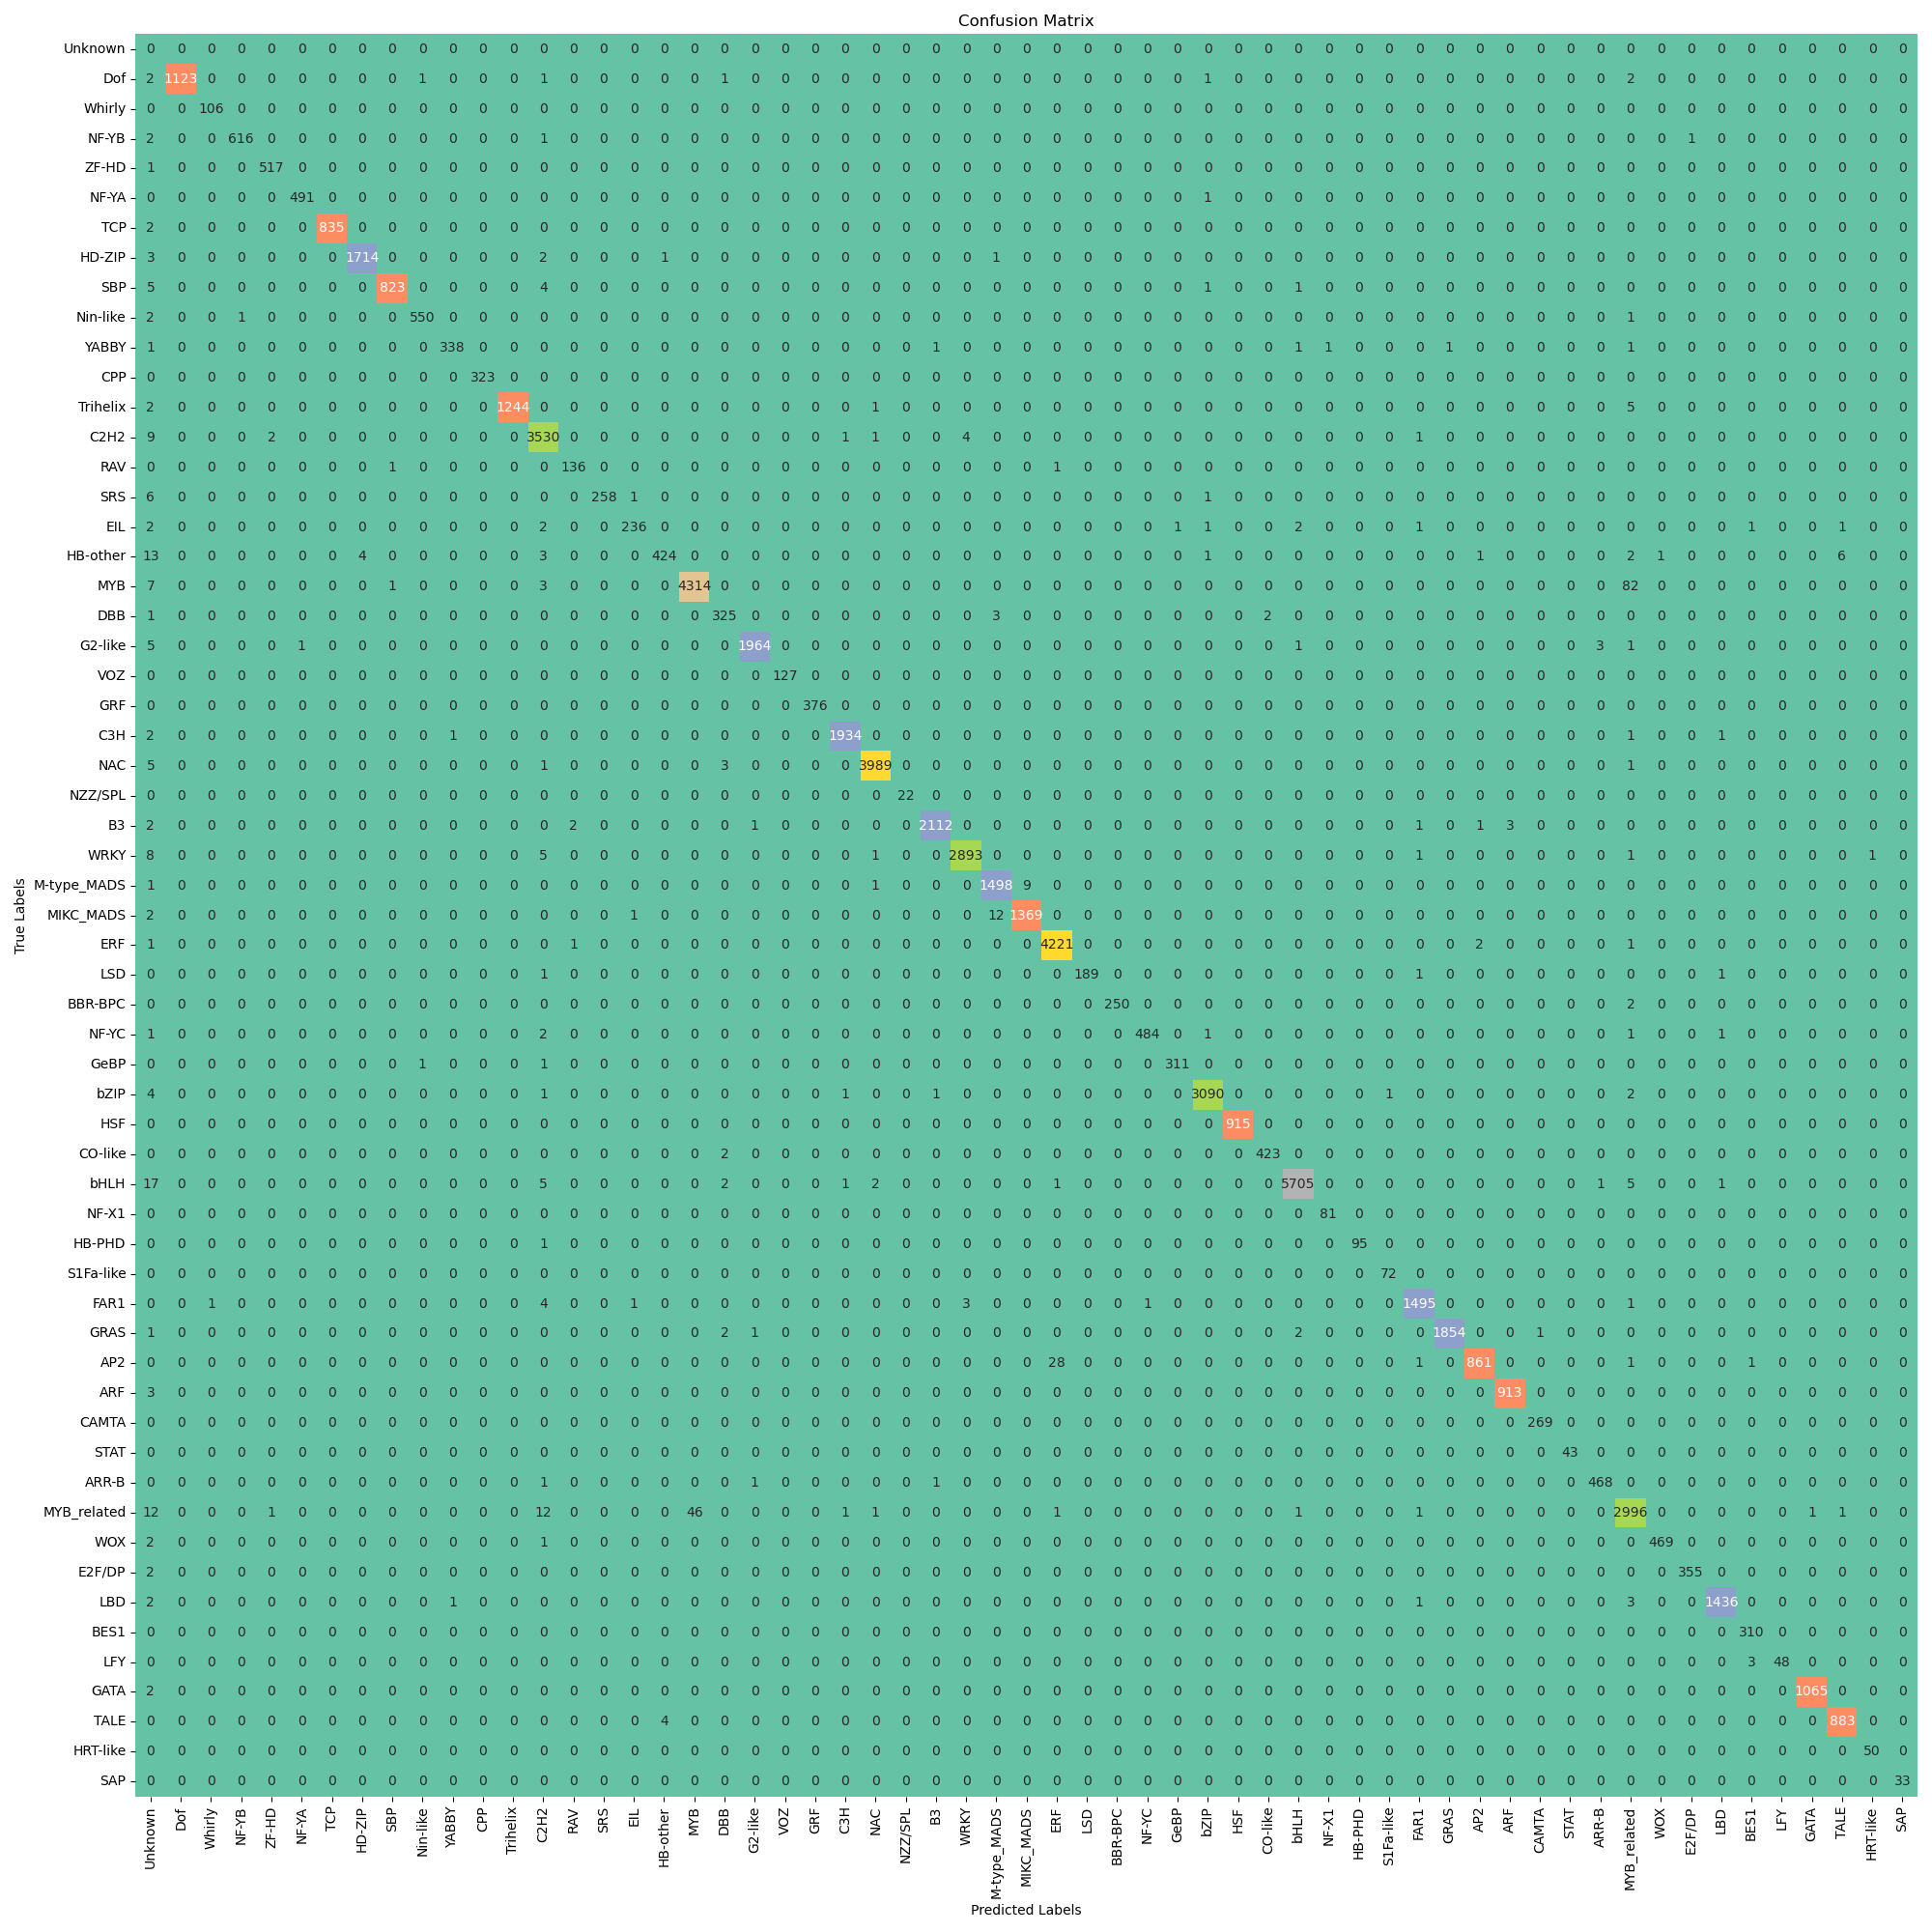

In [18]:
genboard.show_eval_metric(
    true_label=true_label,
    class_mapping_rules=class_mapping,
    voting_method="Two-Stage Voting",
    voting_threshold=0.5,
    binary_class_threshold=0.5,
    components=['confusion_matrix', 'general_accuracy', 'accuracy_per_family'],
    #metrics_storage_path="./metrics"
)